In [1]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('train.csv',usecols=['Age', 'SibSp', 'Parch','Pclass','Survived'])

In [3]:
df.dropna(inplace=True)

In [4]:
df.shape

(714, 5)

In [5]:
df

,Survived,Pclass,Age,SibSp,Parch
0,0,3,22.0,1,0
1,1,1,38.0,1,0
2,1,3,26.0,0,0
3,1,1,35.0,1,0
4,0,3,35.0,0,0
...,...,...,...,...,...
885,0,3,39.0,0,5
886,0,2,27.0,0,0
887,1,1,19.0,0,0
889,1,1,26.0,0,0


In [6]:
df

,Survived,Pclass,Age,SibSp,Parch
0,0,3,22.0,1,0
1,1,1,38.0,1,0
2,1,3,26.0,0,0
3,1,1,35.0,1,0
4,0,3,35.0,0,0
...,...,...,...,...,...
885,0,3,39.0,0,5
886,0,2,27.0,0,0
887,1,1,19.0,0,0
889,1,1,26.0,0,0


In [7]:
x=df.iloc[:,1:5]
y=df.iloc[:,0]

In [8]:
x

,Pclass,Age,SibSp,Parch
0,3,22.0,1,0
1,1,38.0,1,0
2,3,26.0,0,0
3,1,35.0,1,0
4,3,35.0,0,0
...,...,...,...,...
885,3,39.0,0,5
886,2,27.0,0,0
887,1,19.0,0,0
889,1,26.0,0,0


In [9]:
round(np.mean(cross_val_score(LogisticRegression(),x,y,scoring='accuracy',cv=20,)),3)

np.float64(0.693)

In [10]:

scores = cross_val_score( LogisticRegression(), x, y, scoring='accuracy', cv=8)
print(np.mean(scores))

0.6878433208489388


### apply feature construction 


In [11]:
x['family size']=df['SibSp']+df['Parch']+1

In [12]:
x

,Pclass,Age,SibSp,Parch,family size
0,3,22.0,1,0,2
1,1,38.0,1,0,2
2,3,26.0,0,0,1
3,1,35.0,1,0,2
4,3,35.0,0,0,1
...,...,...,...,...,...
885,3,39.0,0,5,6
886,2,27.0,0,0,1
887,1,19.0,0,0,1
889,1,26.0,0,0,1


In [13]:
def num(f):


    if f==1:
        return 0
    
    elif f>1 and f<=4:
        return 1
    
    else:
        return 2


In [14]:
x['family type']= x['family size'].apply(num)

In [15]:
x.sample(6)

,Pclass,Age,SibSp,Parch,family size,family type
730,1,29.0,0,0,1,0
762,3,20.0,0,0,1,0
289,3,22.0,0,0,1,0
714,2,52.0,0,0,1,0
621,1,42.0,1,0,2,1
419,3,10.0,0,2,3,1


In [16]:
x.drop(columns=[
'SibSp'
,
'Parch'
,
'family size'],inplace=True)

In [17]:
x.sample(5)

,Pclass,Age,family type
221,2,27.0,0
638,3,41.0,2
807,3,18.0,0
383,1,35.0,1
212,3,22.0,0


In [18]:
np.mean(cross_val_score(LogisticRegression(),x,y,cv=20))

np.float64(0.7003174603174602)

## feature splitting

In [19]:
titanic =pd.read_csv('train.csv')

In [20]:
titanic['Name'].str.split(',',expand=True)[1]

0                                  Mr. Owen Harris
1       Mrs. John Bradley (Florence Briggs Thayer)
2                                      Miss. Laina
3               Mrs. Jacques Heath (Lily May Peel)
4                                Mr. William Henry
                          ...                     
886                                    Rev. Juozas
887                           Miss. Margaret Edith
888                 Miss. Catherine Helen "Carrie"
889                                Mr. Karl Howell
890                                    Mr. Patrick
Name: 1, Length: 891, dtype: object

In [21]:
df['title']=titanic['Name'].str.split(',',expand=True)[1].str.split('.').str.get(0)

In [22]:
df

,Survived,Pclass,Age,SibSp,Parch,title
0,0,3,22.0,1,0,Mr
1,1,1,38.0,1,0,Mrs
2,1,3,26.0,0,0,Miss
3,1,1,35.0,1,0,Mrs
4,0,3,35.0,0,0,Mr
...,...,...,...,...,...,...
885,0,3,39.0,0,5,Mrs
886,0,2,27.0,0,0,Rev
887,1,1,19.0,0,0,Miss
889,1,1,26.0,0,0,Mr


In [23]:
round(df.groupby('title')['Survived'].mean(),4)


title
Capt            0.0000
Col             0.5000
Don             0.0000
Dr              0.5000
Jonkheer        0.0000
Lady            1.0000
Major           0.5000
Master          0.5833
Miss            0.7192
Mlle            1.0000
Mme             1.0000
Mr              0.1683
Mrs             0.7870
Ms              1.0000
Rev             0.0000
Sir             1.0000
the Countess    1.0000
Name: Survived, dtype: float64

In [24]:
flip = pd.read_csv('flipcart.csv')

In [25]:
f= flip.copy()

In [26]:
flip['total_review']

0            174 Ratings & 15 Reviews
1         2,367 Ratings & 212 Reviews
2         7,146 Ratings & 709 Reviews
3      12,735 Ratings & 1,018 Reviews
4            347 Ratings & 26 Reviews
                    ...              
955            17 Ratings & 0 Reviews
956          344 Ratings & 33 Reviews
957          355 Ratings & 13 Reviews
958          546 Ratings & 36 Reviews
959       1,111 Ratings & 141 Reviews
Name: total_review, Length: 960, dtype: object

In [27]:
# rating

In [28]:
flip['rating']=flip['total_review'].str.split(' ',expand=True)[0]

In [29]:
flip['rating']

0         174
1       2,367
2       7,146
3      12,735
4         347
        ...  
955        17
956       344
957       355
958       546
959     1,111
Name: rating, Length: 960, dtype: object

In [30]:
#flip review

In [31]:
flip['review']=flip['total_review'].str.split(' ',expand=True)[1].str.split('&',expand=True)[1]

In [32]:

# flip['total_review'].str.split('&',expand=True)[0].str.split(' ',expand=True)[0]
#


In [33]:
flip

,Unnamed: 0,name,price,discount,rating,bank,total_review,review
0,0,Samsung Galaxy Book5 AI Metal Intel Core Ultra...,"₹76,689",23% off,174,Upto,174 Ratings & 15 Reviews,15
1,1,ASUS Expertbook P1 Intel Core i3 13th Gen 1315...,"₹33,990",51% off,"2,367",Upto,"2,367 Ratings & 212 Reviews",212
2,2,Samsung Galaxy Book4 Metal Intel Core i3 13th ...,"₹35,990",37% off,"7,146",Upto,"7,146 Ratings & 709 Reviews",709
3,3,Samsung Galaxy Book4 Metal Intel Core i5 13th ...,"₹47,690",39% off,"12,735",Upto,"12,735 Ratings & 1,018 Reviews","1,018"
4,4,ASUS Vivobook S14 (2025) with Office 2024 + M3...,"₹54,990",40% off,347,Top Discount of the Sale,347 Ratings & 26 Reviews,26
...,...,...,...,...,...,...,...,...
955,955,Infinix Intel Core i7 11th Gen 1195G7 - (16 GB...,"₹39,990",55% off,17,Top Discount of the Sale,17 Ratings & 0 Reviews,0
956,956,MSI Thin A15 AMD Ryzen 5 Hexa Core 7535HS - (1...,"₹47,990",34% off,344,Top Discount of the Sale,344 Ratings & 33 Reviews,33
957,957,DELL Intel Core i3 13th Gen 1305U - (8 GB/512 ...,"₹32,990",29% off,355,Top Discount of the Sale,355 Ratings & 13 Reviews,13
958,958,Lenovo IdeaPad 1 AMD Ryzen 7 Octa Core 5700U -...,"₹44,000",32% off,546,Bank Offer,546 Ratings & 36 Reviews,36


In [34]:
flip['bank'].sample(10)

407    Top Discount of the Sale
124               Only few left
46     Top Discount of the Sale
194    Top Discount of the Sale
406    Top Discount of the Sale
372    Top Discount of the Sale
195                        Upto
953    Top Discount of the Sale
650    Top Discount of the Sale
814    Top Discount of the Sale
Name: bank, dtype: object

In [35]:
def bank(s):

    if 'Upto' in s and 'Bank Offer':
        return 'BANK Offer available '
    elif s=='Top Discount of the Sale':
        return "top discount"
    
    elif 'Only few left' in s and 'Only 2 left':
        return "left product"
    else:
        return "Lowest price in the year"

In [36]:
flip['banks']= flip['bank'].apply(bank)

In [37]:
flip['banks'].sample(10)

664    Lowest price in the year
816       BANK Offer available 
19                 top discount
663                top discount
433       BANK Offer available 
199                left product
626       BANK Offer available 
890    Lowest price in the year
57                 top discount
793       BANK Offer available 
Name: banks, dtype: object

In [38]:
flip.drop(columns=['total_review','bank'],inplace=True)

In [39]:
flip.rename(columns={'Unnamed: 0':'drop'},inplace=True)

In [40]:
flip.drop(columns=['drop'],inplace=True)

In [41]:
flip

,name,price,discount,rating,review,banks
0,Samsung Galaxy Book5 AI Metal Intel Core Ultra...,"₹76,689",23% off,174,15,BANK Offer available
1,ASUS Expertbook P1 Intel Core i3 13th Gen 1315...,"₹33,990",51% off,"2,367",212,BANK Offer available
2,Samsung Galaxy Book4 Metal Intel Core i3 13th ...,"₹35,990",37% off,"7,146",709,BANK Offer available
3,Samsung Galaxy Book4 Metal Intel Core i5 13th ...,"₹47,690",39% off,"12,735","1,018",BANK Offer available
4,ASUS Vivobook S14 (2025) with Office 2024 + M3...,"₹54,990",40% off,347,26,top discount
...,...,...,...,...,...,...
955,Infinix Intel Core i7 11th Gen 1195G7 - (16 GB...,"₹39,990",55% off,17,0,top discount
956,MSI Thin A15 AMD Ryzen 5 Hexa Core 7535HS - (1...,"₹47,990",34% off,344,33,top discount
957,DELL Intel Core i3 13th Gen 1305U - (8 GB/512 ...,"₹32,990",29% off,355,13,top discount
958,Lenovo IdeaPad 1 AMD Ryzen 7 Octa Core 5700U -...,"₹44,000",32% off,546,36,Lowest price in the year


In [42]:
flip['discount%']=flip['discount'].str.split('%',expand=True)[0]

In [43]:
flip.drop(columns=['discount'],inplace=True)

In [44]:
flip

,name,price,rating,review,banks,discount%
0,Samsung Galaxy Book5 AI Metal Intel Core Ultra...,"₹76,689",174,15,BANK Offer available,23
1,ASUS Expertbook P1 Intel Core i3 13th Gen 1315...,"₹33,990","2,367",212,BANK Offer available,51
2,Samsung Galaxy Book4 Metal Intel Core i3 13th ...,"₹35,990","7,146",709,BANK Offer available,37
3,Samsung Galaxy Book4 Metal Intel Core i5 13th ...,"₹47,690","12,735","1,018",BANK Offer available,39
4,ASUS Vivobook S14 (2025) with Office 2024 + M3...,"₹54,990",347,26,top discount,40
...,...,...,...,...,...,...
955,Infinix Intel Core i7 11th Gen 1195G7 - (16 GB...,"₹39,990",17,0,top discount,55
956,MSI Thin A15 AMD Ryzen 5 Hexa Core 7535HS - (1...,"₹47,990",344,33,top discount,34
957,DELL Intel Core i3 13th Gen 1305U - (8 GB/512 ...,"₹32,990",355,13,top discount,29
958,Lenovo IdeaPad 1 AMD Ryzen 7 Octa Core 5700U -...,"₹44,000",546,36,Lowest price in the year,32


In [45]:
flip['price']=flip['price'].str.split('₹',expand=True)[1]

In [46]:
flip.sample(10)

,name,price,rating,review,banks,discount%
229,Lenovo IdeaPad Slim 3 Intel Core i5 12th Gen 1...,"44,490","2,565",130,top discount,32
454,MSI Intel Core i5 12th Gen 1235U - (8 GB/512 G...,"38,990",336,33,top discount,30
345,Lenovo IdeaPad Slim 3 Intel Core i3 13th Gen 1...,"38,990",110,9,Lowest price in the year,29
875,HP 255 G10 AMD Ryzen 3 Octa Core 13th Gen AMD ...,"30,780",180,18,Lowest price in the year,26
224,HP Victus AI 31 TOPS AMD Ryzen 5 Hexa Core 864...,"57,990",287,27,BANK Offer available,21
772,Samsung Galaxy Book4 Metal Intel Core i3 13th ...,"35,990","7,146",709,BANK Offer available,37
616,ASUS Vivobook Go 15 AMD Ryzen 5 Quad Core 7520...,"37,579",623,32,top discount,32
121,HP MS Office 2024 Intel Core i5 13th Gen 1334U...,"48,199",496,20,left product,23
444,Apple Apple M3 - (16 GB/256 GB SSD/macOS Sequo...,"84,990",622,41,top discount,26
654,HP Professional 240 G10 (2025) Intel Core i5 1...,"53,236",NaN,NaN,Lowest price in the year,43


In [47]:
flip.isnull().sum()

name          0
price         0
rating       39
review       39
banks         0
discount%     9
dtype: int64

In [48]:
flip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 960 entries, 0 to 959
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   name       960 non-null    object
 1   price      960 non-null    object
 2   rating     921 non-null    object
 3   review     921 non-null    object
 4   banks      960 non-null    object
 5   discount%  951 non-null    object
dtypes: object(6)
memory usage: 45.1+ KB


In [49]:
flip['price'] = pd.to_numeric(flip['price'].str.replace(',', ''), errors='coerce').astype('Int64')


In [50]:
flip['discount%'] = pd.to_numeric(flip['discount%'], errors='coerce').astype('Int64')

In [51]:
flip['laptop_brand']=flip['name'].str.split(' ',expand=True)[0]

In [52]:
flip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 960 entries, 0 to 959
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   name          960 non-null    object
 1   price         960 non-null    Int64 
 2   rating        921 non-null    object
 3   review        921 non-null    object
 4   banks         960 non-null    object
 5   discount%     951 non-null    Int64 
 6   laptop_brand  960 non-null    object
dtypes: Int64(2), object(5)
memory usage: 54.5+ KB


<Axes: xlabel='laptop_brand'>

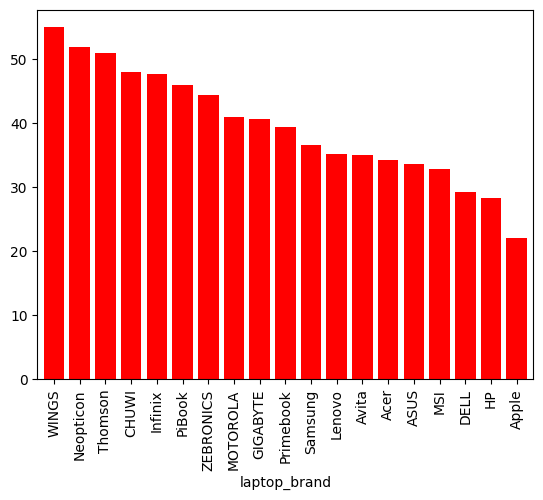

In [53]:
flip.groupby('laptop_brand')['discount%'].mean().sort_values(ascending=0).plot(kind='bar',width=0.8,color='red')

In [54]:
flip.groupby('laptop_brand')['price'].sum()

laptop_brand
ASUS         13094651
Acer          3583489
Apple         2913419
Avita           35980
CHUWI           35980
DELL          6265002
GIGABYTE       224970
HP            5831246
Infinix        525254
Lenovo        6728580
MOTOROLA        64990
MSI           4130008
Neopticon       31980
PiBook          13498
Primebook       86450
Samsung       4501618
Thomson         28990
WINGS           63980
ZEBRONICS      165469
Name: price, dtype: Int64

<Axes: xlabel='laptop_brand'>

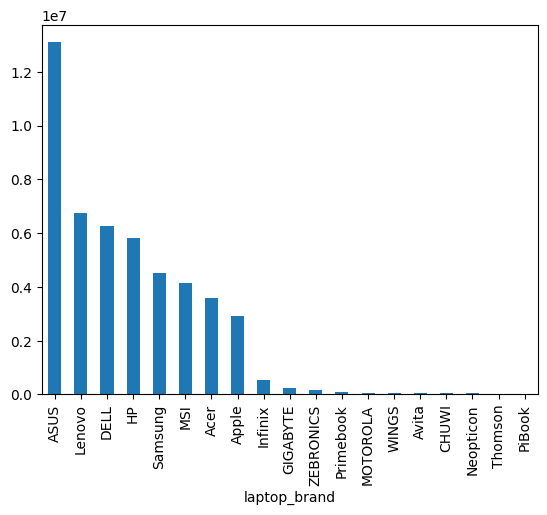

In [55]:
flip.groupby('laptop_brand')['price'].sum().sort_values(ascending=0).plot(kind='bar')

<Axes: ylabel='price'>

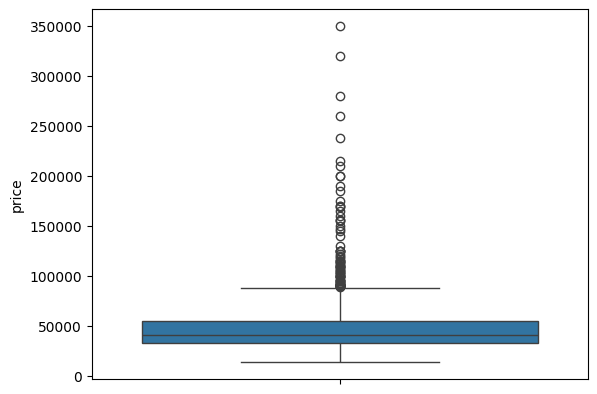

In [56]:
sns.boxplot(flip['price'])

In [57]:
q1 = flip['price'].quantile(0.25)
q3 = flip['price'].quantile(0.75)

iqr= q3-q1


lower = q1-1.5* iqr
upper =q3+1.5*iqr

In [58]:
lower

np.float64(-10.0)

In [59]:
upper

np.float64(87990.0)

In [60]:
# flip[(flip['price'] >upper ) | (flip['price']<lowr)]

In [61]:
flip_clean = flip[(flip['price'] >= upper) & (flip['price'] <= lower)]


In [62]:
new=flip[(flip['price'] >lower ) & (flip['price']<upper)]

<Axes: >

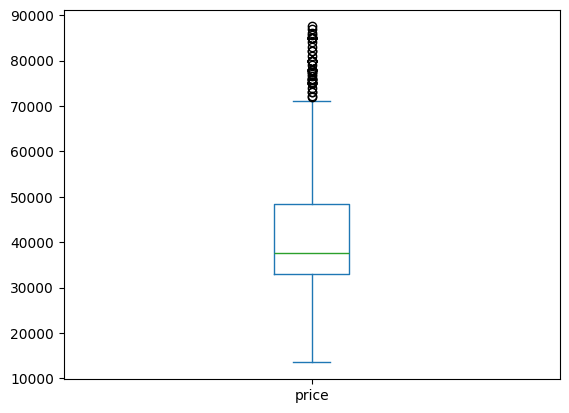

In [63]:
new['price'].plot(kind='box')

### capping

In [64]:
# flip['price']=np.where(


#     flip['price']>upper,
#     upper,
#     np.where(


#         flip['price']<lower,
#         lower,
#         flip['price']
#     )

# )

In [65]:
flip['price'] = np.where(
    flip['price'] > upper,
    upper,
    np.where(
        flip['price'] < lower,
        lower,
        flip['price']
    )
)

<Axes: ylabel='price'>

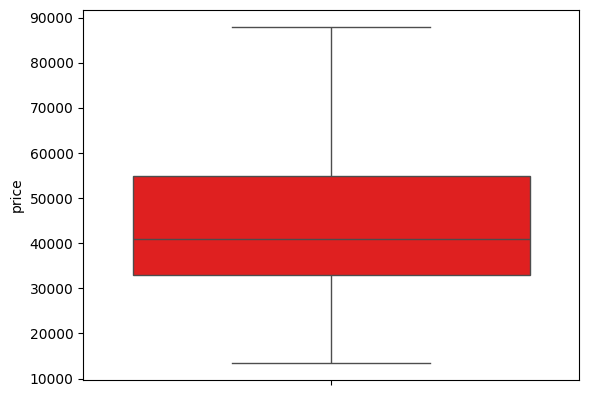

In [69]:
sns.boxplot(flip['price'],color='red')

In [76]:
q1 = flip['price'].quantile(0.25)
q3 = flip['price'].quantile(0.75)
iqr = q3 - q1

lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr

flip['price'] = np.where(
    flip['price'] > upper, upper,
    np.where(flip['price'] < lower, lower, flip['price'])
)


<Axes: ylabel='price'>

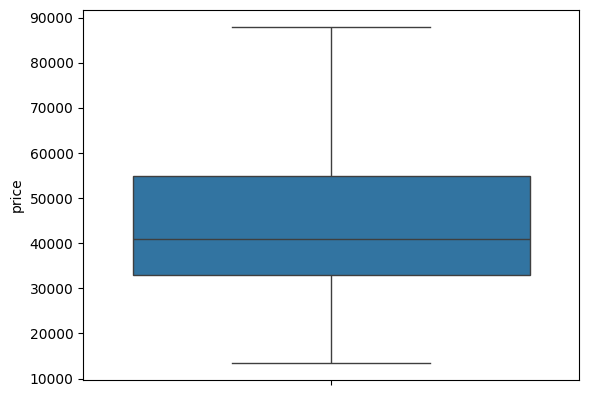

In [77]:
# sns.histplot(flip['price'],kde=True)
sns.boxplot(flip['price'])